<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong>
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

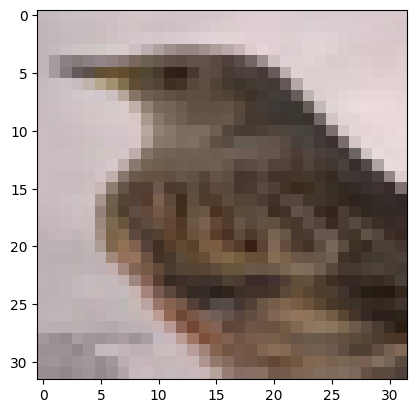

In [8]:
# FROG
plt.imshow(x_train[18])

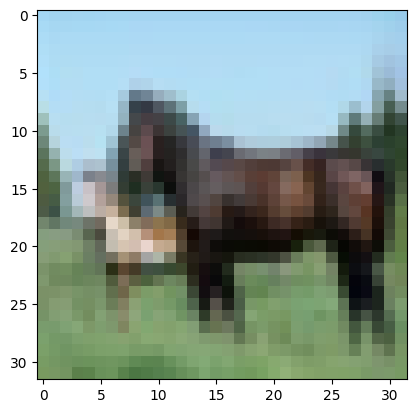

In [9]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
x_train[0].shape

(32, 32, 3)

In [12]:
x_train.max()

255

In [13]:
x_train = x_train/225

In [14]:
x_test = x_test/255

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(50000, 1)

In [19]:
y_train[0]

array([6], dtype=uint8)

In [20]:
y_cat_train = to_categorical(y_train,10)

In [21]:
y_cat_train.shape

(50000, 10)

In [22]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [29]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5388 - accuracy: 0.4453 - val_loss: 1.6233 - val_accuracy: 0.4446
Epoch 2/15
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1775 - accuracy: 0.5873 - val_loss: 1.2212 - val_accuracy: 0.5697
Epoch 3/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0202 - accuracy: 0.6464 - val_loss: 1.1806 - val_accuracy: 0.5936
Epoch 4/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9120 - accuracy: 0.6859 - val_loss: 1.3735 - val_accuracy: 0.5476
Epoch 5/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8263 - accuracy: 0.7160 - val_loss: 0.9752 - val_accuracy: 0.6709
Epoch 6/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7522 - accuracy: 0.7411 - val_loss: 0.9862 - val_accuracy: 0.6709
Epoch 7/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6933 - accuracy: 0.7642 - val_loss: 1.0183 -

In [ ]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.538791,0.44530,1.623255,0.4446
1,1.177499,0.58734,1.221168,0.5697
2,1.020177,0.64638,1.180582,0.5936
3,0.912001,0.68588,1.373519,0.5476
4,0.826261,0.71604,0.975156,0.6709


<Axes: >

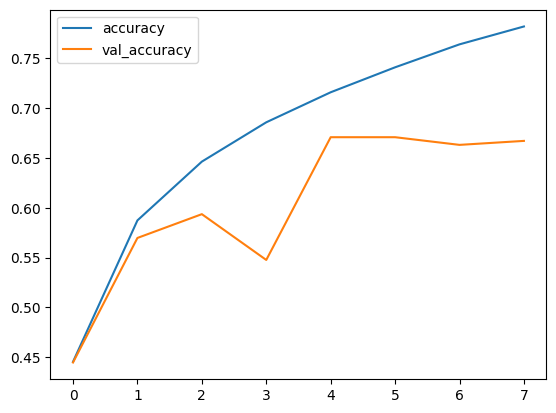

In [32]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

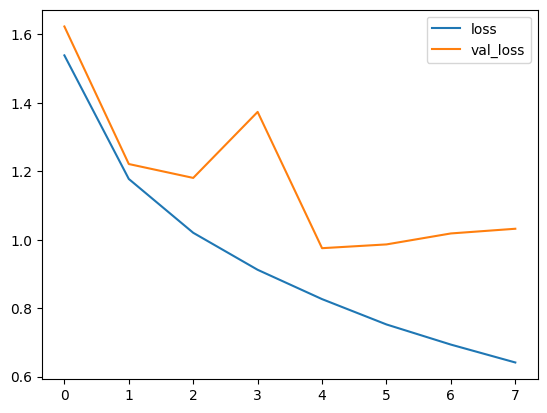

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0319647789001465, 0.6672000288963318]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

# predictions = model.predict_classes(x_test)
# prediction = model.predict(x_test)
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 4s 12ms/step


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.69      0.71      1000
           1       0.84      0.72      0.77      1000
           2       0.62      0.46      0.53      1000
           3       0.55      0.34      0.42      1000
           4       0.52      0.74      0.61      1000
           5       0.52      0.67      0.58      1000
           6       0.69      0.83      0.75      1000
           7       0.79      0.64      0.71      1000
           8       0.80      0.78      0.79      1000
           9       0.69      0.82      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000



In [38]:
confusion_matrix(y_test,predictions)

array([[685,  21,  49,  19,  54,  16,  13,  14,  71,  58],
       [ 33, 721,  13,   7,   7,  11,  24,   5,  29, 150],
       [ 58,   7, 456,  53, 163, 109,  89,  28,  16,  21],
       [ 13,  11,  52, 338, 144, 274, 102,  26,  14,  26],
       [ 13,   3,  28,  25, 737,  53,  74,  41,  18,   8],
       [  8,   3,  43,  87, 100, 666,  38,  31,  10,  14],
       [  4,   4,  30,  34,  52,  31, 826,   6,   6,   7],
       [  6,   6,  25,  32, 132, 100,  22, 644,   3,  30],
       [ 76,  28,  17,   8,  17,  14,   9,   5, 777,  49],
       [ 21,  57,  18,  13,   9,  13,   8,  11,  28, 822]])

<Axes: >

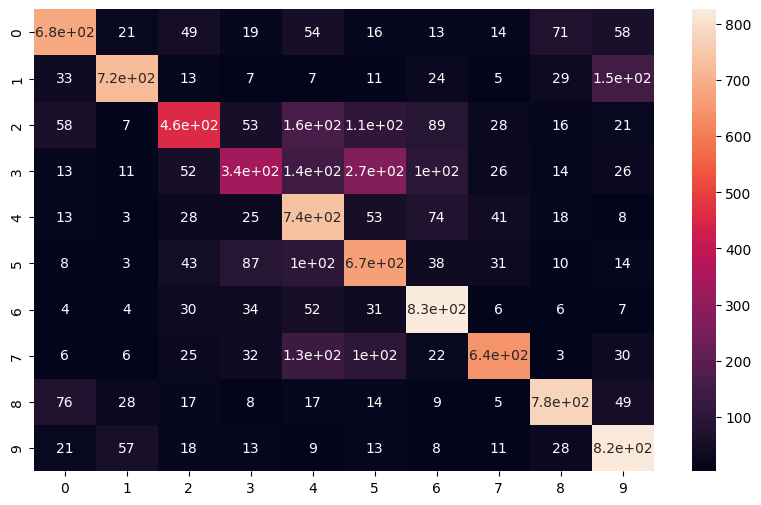

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [40]:
my_image = x_test[16]

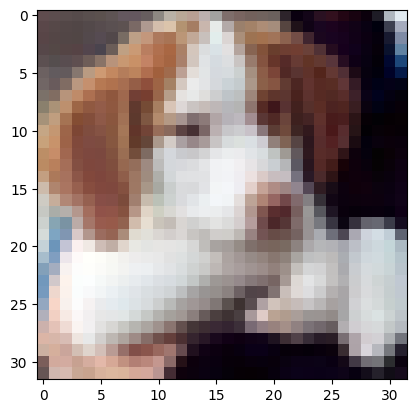

In [41]:
plt.imshow(my_image)

In [45]:
# SHAPE --> (num_images,width,height,color_channels)
# np.argmax(model.predict(my_image.reshape(1,32,32,3),axis=1) )
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=1)

1/1 [==============================] - 0s 45ms/step


array([5])

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html